In [2]:
import matplotlib.pyplot as plt
url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL"
import urllib
res = urllib.request.urlopen(url).read()
url2 = "https://financialmodelingprep.com/api/v3/historical-price-full/FB"
res2 = urllib.request.urlopen(url2).read()

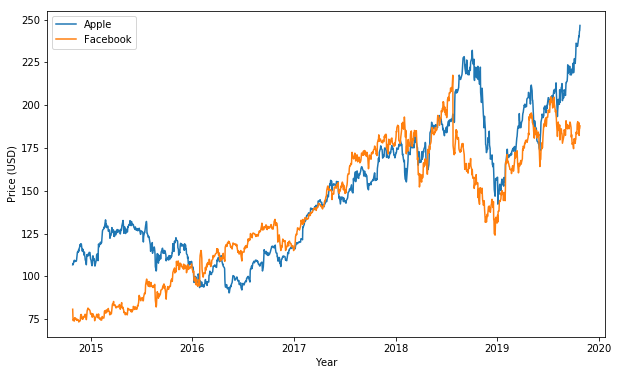

In [3]:
plt.rcParams["figure.figsize"] = [10, 6]
import json
from datetime import datetime
data = json.loads(res)
apple_prices = [d["close"] for d in data["historical"]]
apple_dates = [datetime.strptime(d["date"], "%Y-%m-%d")
               for d in data["historical"]]
plt.plot(apple_dates, apple_prices)
data2 = json.loads(res2)
fb_prices = [d["close"] for d in data2["historical"]]
fb_dates = [datetime.strptime(d["date"], "%Y-%m-%d")
               for d in data2["historical"]]
plt.plot(fb_dates, fb_prices)
axes = plt.gca()
axes.set_xlabel("Year")
axes.set_ylabel("Price (USD)")
plt.legend(["Apple", "Facebook"])
plt.savefig("stocks.png")

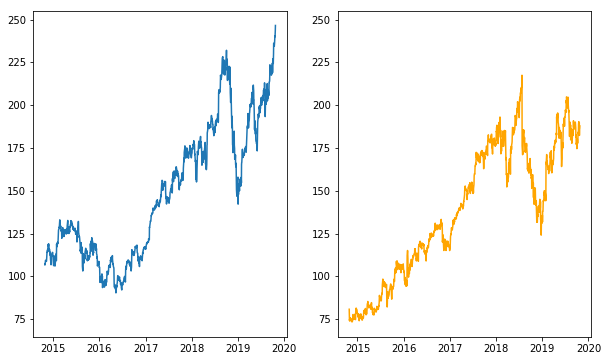

In [5]:
ax1 = plt.subplot(1, 2, 1)
plt.plot(apple_dates, apple_prices)
plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(fb_dates, fb_prices, c="orange")

([<matplotlib.patches.Wedge at 0x7f1ed9ae9e48>,
 [Text(1.0554422683381766, 0.30990582150899426, ''),
  Text(0.4569564802357173, 1.000595210447554, ''),
  Text(-0.9253789316708985, 0.5947048283136995, ''),
  Text(0.15654647964602333, -1.0888035634174043, '')])

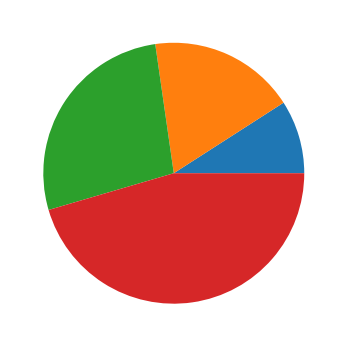

In [7]:
plt.pie([1, 2, 3, 5])

<BarContainer object of 2 artists>

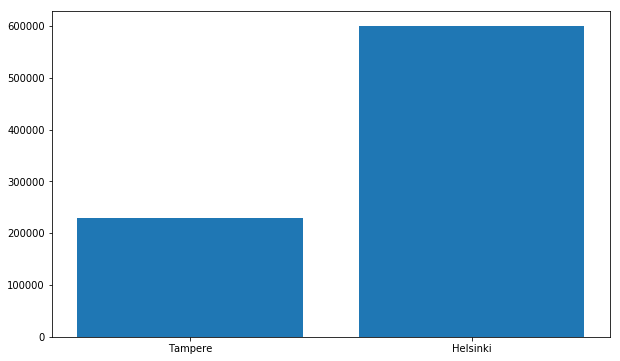

In [8]:
plt.bar(["Tampere", "Helsinki"], [230000, 600000])

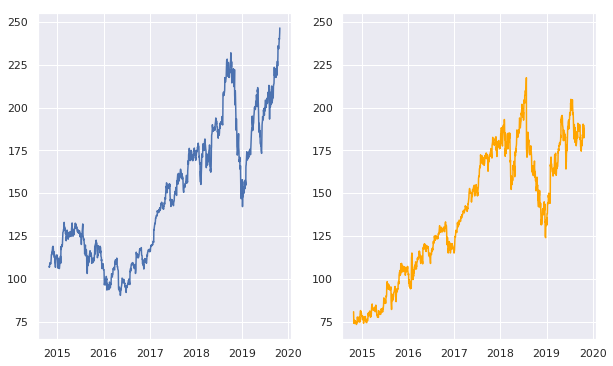

In [10]:
import seaborn
seaborn.set()

plt.pie([1, 2, 3, 5])
ax1 = plt.subplot(1, 2, 1)
plt.plot(apple_dates, apple_prices)
plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(fb_dates, fb_prices, c="orange")

In [17]:
from urllib import request
req = request.urlopen("http://api.worldbank.org/countries/fin/indicators/EG.USE.PCAP.KG.OE")
data = req.read()

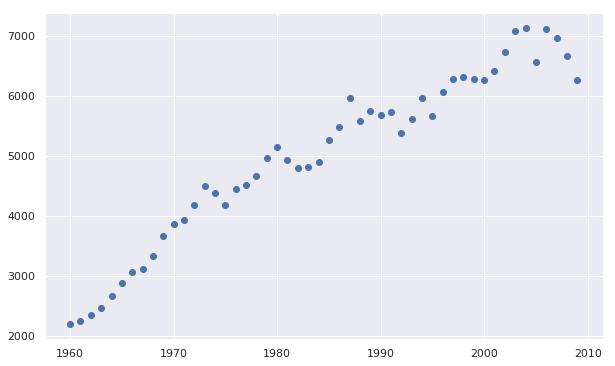

In [26]:
import xml.etree.ElementTree as ET
from io import BytesIO
root = ET.parse(BytesIO(data)).getroot()
dates = []
vals = []
for child in root:
    dateEl = child.find("{http://www.worldbank.org}date")
    valEl = child.find("{http://www.worldbank.org}value")
    dates.append(int(dateEl.text))
    vals.append(float(valEl.text))
plt.scatter(dates, vals)

In [28]:
import csv
pops = []
with open("population_utf8.csv") as infile:
    rd = csv.reader(infile, delimiter=";")
    for line in rd:
        pops.append((line[0], int(line[2])))

In [40]:
xml = ET.Element("populationdata")
for pop in pops:
    municipality = ET.SubElement(xml, "municipality")
    name = ET.SubElement(municipality, "name")
    name.text = pop[0]
    population = ET.SubElement(municipality, "population")
    population.text = str(pop[1])
xmlstr = ET.tostring(xml)
from xml.dom import minidom
#print(minidom.parseString(xmlstr).toprettyxml(indent="  "))

In [42]:
data = request.urlopen("https://maps.wikimedia.org/osm-intl/6/35/22.png").read()

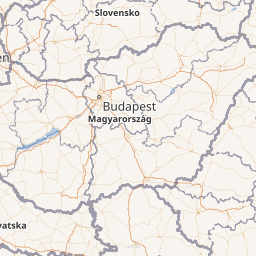

In [45]:
from PIL import Image
img = Image.open(BytesIO(data))
img

In [46]:
import time
zoom = 6
imgs = []
for x in range(34, 37):
    for y in range(21, 24):
        imgs.append(request.urlopen("https://maps.wikimedia.org/osm-intl/{}/{}/{}.png".format(zoom, x, y)).read())
        time.sleep(1)

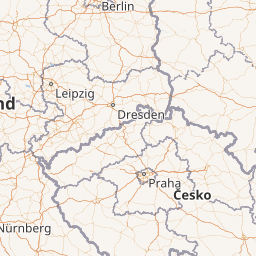

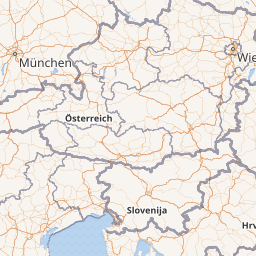

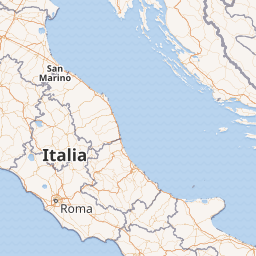

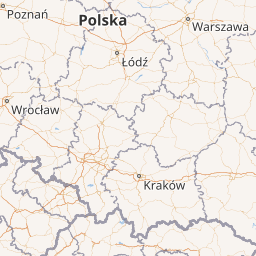

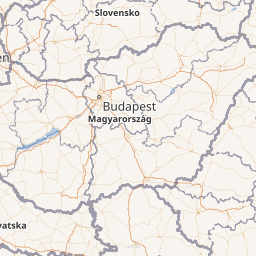

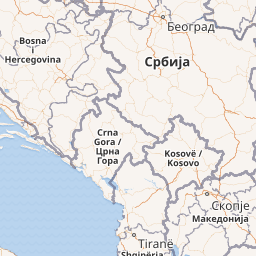

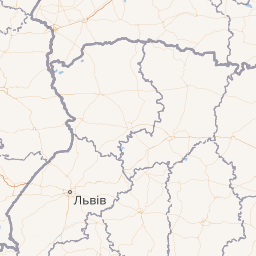

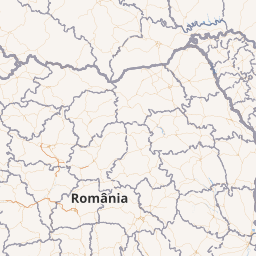

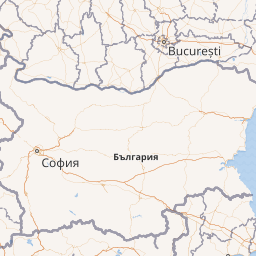

In [47]:
from IPython.display import display
for data in imgs:
    img = Image.open(BytesIO(data))
    display(img)